In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# Data Preprocess
1. Drop nan value
2. Drop the value that the 'gender == Other'
3. Convert Categories to numbers
4. Split the Dataset into train set and test set

In [7]:
# Step 1: Drop nan value
df = df.dropna()

In [8]:
# Step 2: Drop the value that the 'gender == Other'
df = df.loc[df['gender'] != 'Other']

In [9]:
# Step 3: Convert Categories to numbers
df['gender'] = df.iloc[:,1].astype('category').cat.codes
df['ever_married'] = df.iloc[:,5].astype('category').cat.codes
df['work_type'] = df.iloc[:,6].astype('category').cat.codes
df['Residence_type'] = df.iloc[:,7].astype('category').cat.codes
df['smoking_status'] = df.iloc[:,10].astype('category').cat.codes

In [10]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4908 non-null   int64  
 1   gender             4908 non-null   int8   
 2   age                4908 non-null   float64
 3   hypertension       4908 non-null   int64  
 4   heart_disease      4908 non-null   int64  
 5   ever_married       4908 non-null   int8   
 6   work_type          4908 non-null   int8   
 7   Residence_type     4908 non-null   int8   
 8   avg_glucose_level  4908 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     4908 non-null   int8   
 11  stroke             4908 non-null   int64  
dtypes: float64(3), int64(4), int8(5)
memory usage: 330.7 KB


In [12]:
df = df.sample(frac=1).reset_index(drop=True)

In [13]:
# Step 4: Split the Dataset into train set and test set
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Feature Selection

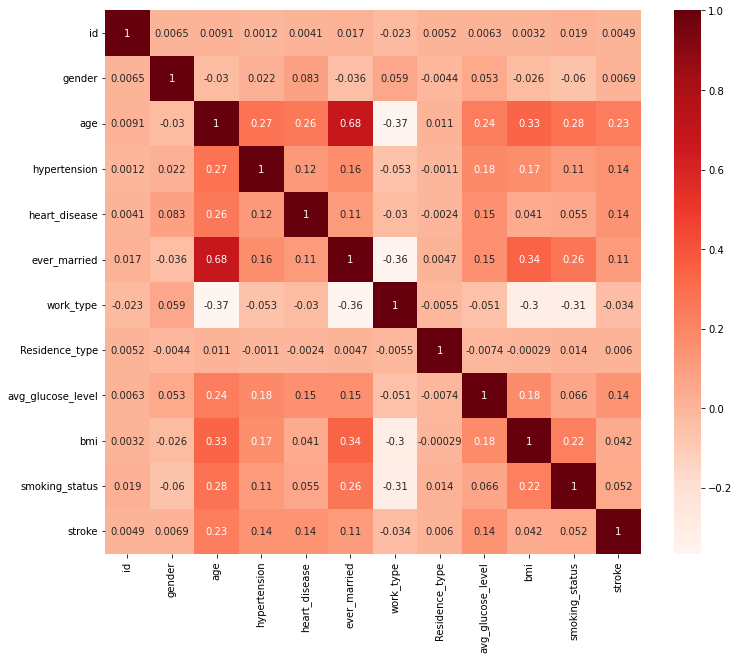

In [14]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [15]:
#Correlation with output variable
cor_target = abs(cor["stroke"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

age                  0.232313
hypertension         0.142503
heart_disease        0.137929
ever_married         0.105051
avg_glucose_level    0.138984
stroke               1.000000
Name: stroke, dtype: float64

In [16]:
df=df[['age','hypertension','heart_disease','ever_married','avg_glucose_level','stroke']]

In [17]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [18]:
from imblearn.under_sampling import RandomUnderSampler

sampling_strategy = 0.8
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(x, y)

In [19]:
X_res['stroke']=y_res

In [20]:
data=X_res

In [21]:
data

,age,hypertension,heart_disease,ever_married,avg_glucose_level,stroke
0,32.0,0,0,1,61.83,0
1,61.0,0,0,1,55.26,0
2,28.0,0,0,0,256.74,0
3,40.0,1,0,1,212.01,0
4,61.0,0,0,1,129.31,0
...,...,...,...,...,...,...
465,70.0,0,0,1,221.58,1
466,81.0,1,0,1,80.43,1
467,73.0,0,1,1,219.73,1
468,52.0,0,0,1,96.59,1


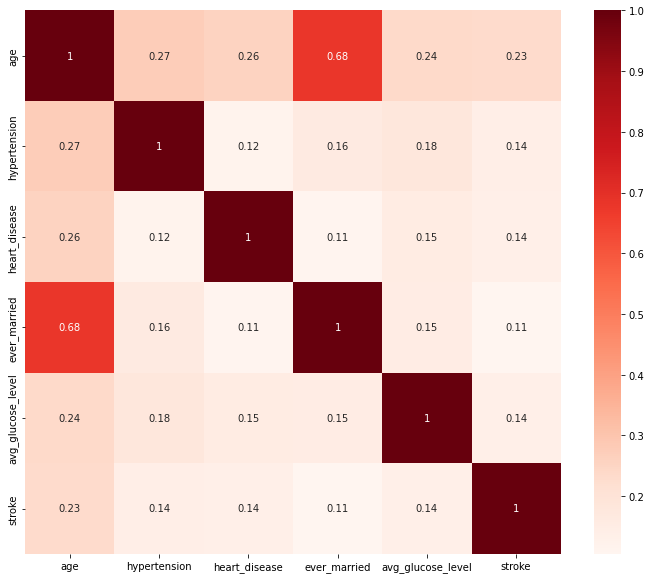

In [22]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

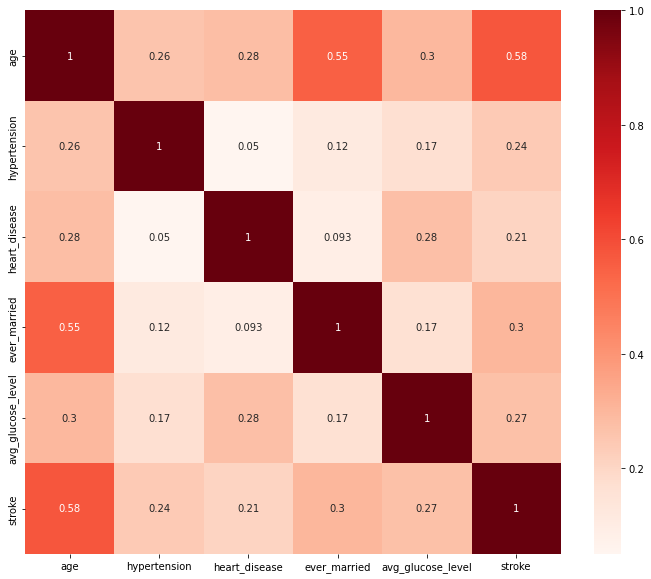

In [23]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [24]:
data['stroke'].value_counts()

0    261
1    209
Name: stroke, dtype: int64

In [25]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
y_test.value_counts()

1    50
0    44
Name: stroke, dtype: int64

# Predict
- Method 1: Naive Bayes
    - 1.1: GaussianNB
    - 1.2: BernoulliNB
    - 1.3: ComplementNB
- Method 2: Decision Tree
- Method 3: KNN
- Method 4: SVM
- Method 5: Neural Network

### Method 1: Naive Bayes

[https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes)

In the Bayesian method, we tried three Bayesian classification methods: GaussianNB, BernoulliNB, ComplementNB. Among the three of them, the results of GaussianNB are relatively best, but generally speaking, their prediction results are not very good. 

Adjusting the parameters in these three methods is of little significance. On the one hand, their own results are too bad, and the improvement that the adjustment can improve is limited; on the other hand, we also tried to adjust some parameters, but the results didn't change or even were worse.

In [27]:
# Naive Bayes - GaussianNB
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb = model_gnb.fit(X_train, y_train)
print("Train Score:", model_gnb.score(X_train, y_train))
print("Test Score:", model_gnb.score(X_test, y_test))

Train Score: 0.7340425531914894
Test Score: 0.648936170212766


In [28]:
# Naive Bayes - BernoulliNB
from sklearn.naive_bayes import BernoulliNB
model_bnb = BernoulliNB()
model_bnb = model_bnb.fit(X_train, y_train)
print("Train Score:", model_bnb.score(X_train, y_train))
print("Test Score:", model_bnb.score(X_test, y_test))

Train Score: 0.6888297872340425
Test Score: 0.5212765957446809


In [29]:
# Naive Bayes - ComplementNB
from sklearn.naive_bayes import ComplementNB
model_conb = ComplementNB()
model_conb = model_conb.fit(X_train, y_train)
print("Train Score:", model_conb.score(X_train, y_train))
print("Test Score:", model_conb.score(X_test, y_test))

Train Score: 0.601063829787234
Test Score: 0.5957446808510638


### Method 2: Decision Tree
[https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree)
DecisionTreeClassifier
Parameter:
- criterion: "gini", "entropy"
- splitter: "random", "best"
- max_depth: 

In [307]:
random_state_num = 42

In [343]:
# Decision Tree - DecisionTreeClassifier
from sklearn import tree
def decision_tree(print_flag = True, **args):
    model_tree = tree.DecisionTreeClassifier(**args, random_state=random_state_num)
    model_tree = model_tree.fit(X_train, y_train)
    if print_flag:
        print(args)
        print("Score: {}, {}".format(model_tree.score(X_train, y_train),model_tree.score(X_test, y_test)))
        # print("Train Score:", model_tree.score(X_train, y_train))
        # print("Test Score:", model_tree.score(X_test, y_test))
        print("--------------")
    return model_tree.score(X_train, y_train), model_tree.score(X_test, y_test)
    
_,_ = decision_tree(criterion = "gini", splitter = "best", max_depth = 12)

# decision_tree(criterion = "gini", splitter = "random")
# decision_tree(criterion = "entropy", splitter = "best")
# decision_tree(criterion = "entropy", splitter = "random")

{'criterion': 'gini', 'splitter': 'best', 'max_depth': 12}
Score: 0.9840425531914894, 0.7659574468085106
--------------


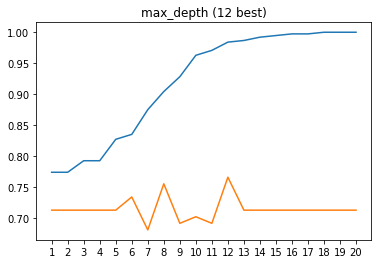

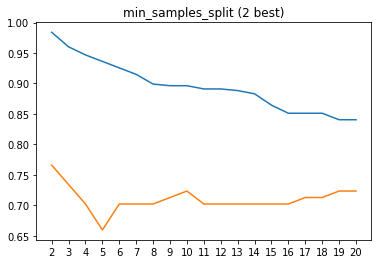

In [354]:
# Decision Tree - DecisionTreeClassifier

# max_depth (12 best)
def plot_tree_max_depth():
    x_data = []
    train_data = []
    test_data = []
    for num in range(1, 21):
        train_score, test_score = decision_tree(print_flag = False, criterion = "gini", splitter = "best", max_depth = num)
        train_data.append(train_score)
        test_data.append(test_score)
        x_data.append(num)

    plt.plot(x_data, train_data)
    plt.plot(x_data, test_data)
    plt.xticks([i for i in range(1, 21)])
    plt.title("max_depth (12 best)")
    plt.show()

# min_samples_split
def plot_tree_samples_split():
    x_data = []
    train_data = []
    test_data = []
    for num in range(2, 21):
        train_score, test_score = decision_tree(print_flag = False, criterion = "gini", splitter = "best", max_depth = 12,
                                                min_samples_split = num)
        train_data.append(train_score)
        test_data.append(test_score)
        x_data.append(num)

    plt.plot(x_data, train_data)
    plt.plot(x_data, test_data)
    plt.xticks([i for i in range(2, 21)])
    plt.title("min_samples_split (2 best)")
    plt.show()

plot_tree_max_depth()
plot_tree_samples_split()

In [329]:
# Decision Tree - ExtraTreeClassifier
model_extree = tree.ExtraTreeClassifier(random_state=random_state_num)
model_extree = model_extree.fit(X_train, y_train)
print("Train Score:", model_extree.score(X_train, y_train))
print("Test Score:", model_extree.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.6595744680851063


In [273]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn.fit(X_train, y_train)
print("Train Score:", model_knn.score(X_train, y_train))
print("Test Score:", model_knn.score(X_test, y_test))

Train Score: 0.8404255319148937
Test Score: 0.6276595744680851


In [274]:
# SVM
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)

print("Train Score:", model_svm.score(X_train, y_train))
print("Test Score:", model_svm.score(X_test, y_test))

Train Score: 0.7845744680851063
Test Score: 0.6702127659574468


In [263]:
# Neural Network
from sklearn.neural_network import MLPClassifier
model_MLP = MLPClassifier()
model_MLP.fit(X_train, y_train)
print("Train Score:", model_MLP.score(X_train, y_train))
print("Test Score:", model_MLP.score(X_test, y_test))

Train Score: 0.7473404255319149
Test Score: 0.6382978723404256


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [264]:
y_pred=model_MLP.predict(X_test)

In [265]:
confusion_matrix(y_test,y_pred)

array([[31, 13],
       [21, 29]], dtype=int64)

In [266]:
recall_score(y_test,y_pred)

0.58